In [4]:
# To run this code you need python 3 + the standard packages like numpy, scipy, matplotlib, pandas
# and a special package 'madx' that you can find at https://github.com/sterbini/cl2pd and you can install with
# pip install git+https://github.com/sterbini/madx.git
# The package is tested only on Mac. It should be working also on UNIX-like environment but it is not working on WIN.
from matplotlib import pyplot as plt
from madx import madx
from collections import OrderedDict

In [5]:
madExecutable = '/usr/local/bin/madx'
myMad = madx.MadX(madExecutable)

  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.02.13  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2016.12.20               +
  + Execution date: 2019.01.21 21:12:14      +
  ++++++++++++++++++++++++++++++++++++++++++++




# An introduction to MAD-X

In this first part we are going to get familiar with MAD-X syntax. This is an extension of what it is required from the tutorial.

For more information please refer to the [MAD-X online manual](http://cern.ch/madx/releases/last-rel/madxuguide.pdf).


In [6]:
myString='''
stop;
'''
myMad.input(myString);

stop;
  Number of warnings: 0
  ++++++++++++++++++++++++++++++++++++++++++++
  +          MAD-X finished normally         +
  ++++++++++++++++++++++++++++++++++++++++++++


With the 'stop;' instruction we exit from MAD-X, so, as done in the following cell we need to re-istantiate our MAD-X object with the 
**myMad = madx.MadX(madExecutable)** instruction.

---
It is a good practice to make header, please use '!' to comment the single line.

In [8]:
myMad = madx.MadX(madExecutable)
myString='''
!***************************************
! It is a good practice to make a header
!***************************************
title,'My test'; 
value, title;
'''
myMad.input(myString);

  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.02.13  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2016.12.20               +
  + Execution date: 2019.01.21 21:14:31      +
  ++++++++++++++++++++++++++++++++++++++++++++


!***************************************
! It is a good practice to make a header
!***************************************
title,'My test'; 
value, title;
title              =                  0 ;


---
Print the version of MAD-X

In [9]:
myString='''
value, VERSION;
'''
myMad.input(myString);

value, VERSION;
version            =              50213 ;


--- 
Use the **help** keyword (very rudimental help)

In [10]:
myString='''
help, title;
'''
myMad.input(myString);

help, title;
command: title  module: control
parameter: dummy   string: 0


---
This is an example to make a system call, just for showing you how to do it. The system call string (in this case 'pwd') depends on the Operating System.

In [13]:
myString='''
system,'date';
'''
myMad.input(myString);


system,'date';
Mon Jan 21 21:15:01 CET 2019


---
This is an example to get familiar with the use of the physical constants and the formatting of the output. Have a look on the difference.

In [14]:
myString='''
a=pi;
value a; 
set, format="22.20e";
value a; 
! reset to nominal values
option,reset=True;
set, format="10d", "18.10g", "-18s";
'''
myMad.input(myString);

a=pi;
value a; 
a                  =        3.141592654 ;
set, format="22.20e";
value a; 
a                  = 3.14159265358979311600e+00 ;
! reset to nominal values
option,reset=True;
set, format="10d", "18.10g", "-18s";


---
This is an example to get familiar with **if** and deferred expression. Please note the after the block delimited with **{...}** the **;** can be omitted. Pay attention to circular call!

In [15]:
myString='''
if (1==1){
option, echo=false, info=true;
a=pi;
b:=a;
c=a;
value a; 
value b;
value c;
a=CLIGHT*cos(a);
value a;
value b;
value c;}
! BEWARE of circular call!
!a:=a+1;
! When evaluating you will get a fatal error
! value a; 
option, echo=true, info=true;
'''
myMad.input(myString);

if (1==1){
option, echo=false, info=true;
a=pi;
b:=a;
c=a;
value a; 
value b;
value c;
a=CLIGHT*cos(a);
value a;
value b;
value c;}
++++++ info: a redefined
a                  =        3.141592654 ;
b                  =        3.141592654 ;
c                  =        3.141592654 ;
++++++ info: a redefined
a                  =         -299792458 ;
b                  =         -299792458 ;
c                  =        3.141592654 ;


---
This is an example to get familiar with **while** and **macros** loops.

In [16]:
myString='''
a(myvariable1,myvariable2): macro = {
value, myvariable1;
value, myvariable1*myvariable2;
}

N=1;
while (N<10){
exec, a(N,N);
N=N+1;
}
'''
myMad.input(myString);

a(myvariable1,myvariable2): macro = {
value, myvariable1;
value, myvariable1*myvariable2;
}
N=1;
while (N<10){
exec, a(N,N);
N=N+1;
}
n                  =                  1 ;
n*n                =                  1 ;
++++++ info: n redefined
n                  =                  2 ;
n*n                =                  4 ;
++++++ info: n redefined
n                  =                  3 ;
n*n                =                  9 ;
++++++ info: n redefined
n                  =                  4 ;
n*n                =                 16 ;
++++++ info: n redefined
n                  =                  5 ;
n*n                =                 25 ;
++++++ info: n redefined
n                  =                  6 ;
n*n                =                 36 ;
++++++ info: n redefined
n                  =                  7 ;
n*n                =                 49 ;
++++++ info: n redefined
n                  =                  8 ;
n*n                =                 64 ;
++++++ info: n rede

---
### List of functions
In MAD-X the following functions are available

- SQRT(x) square root,
- LOG(x) natural logarithm,
- LOG10(x) logarithm base 10,
- EXP(x) exponential,
- SIN(x) trigonometric sine,
- COS(x) trigonometric cosine,
- TAN(x) trigonometric tangent,
- ASIN(x) arc sine,
- ACOS(x) arc cosine,
- ATAN(x) arc tangent,
- SINH(x) hyperbolic sine,
- COSH(x) hyperbolic cosine,
- TANH(x) hyperbolic tangent,
- SINC(x) cardinal sine function,
- ABS(x) absolute value,
- ERF(x) Gauss error,
- ERFC(x) complementary error,
- FLOOR(x) floor, largest previous integer,
- CEIL(x) ceiling, smallest next integer,
- ROUND(x) round, closest integer,
- FRAC(x) fractional part of number,
- RANF() random number, uniformly distributed in [0,1],
- GAUSS() random number, gaussian distribution with unit standard deviation,
- TGAUSS(x) random number, gaussian distribution with unit standard deviation, truncated at x standard deviations;

In [17]:
myString='''
value, 1+1.2;
value, 1-1.2;
value, 1*1.2;
value, 1/1.2;
value, 2^0.5;
value, 1/0;
value, 2^-0.5;
value, sqrt(3);
value, log(10);
value, log10(10^2);
value, exp(0);
value, sin(pi/2);
value, cos(sqrt(2)/2);
value, tan(pi/2);
value, asin(0);
value, acos(0);
value, atan(0);
value, sinh(pi/2);
value, cosh(sqrt(2)/2);
value, tanh(pi/2);
value, sinc(0);
value, abs(-1.2);
value, erf(1);
value, 1-erfc(1);
value, ceil(2.3);
value, round(2.3);
value, frac(2.3);
value, ranf();
value, gauss();
value, tgauss(.1);
'''
myMad.input(myString)

value, 1+1.2;
1+1.2              =                2.2 ;
value, 1-1.2;
1-1.2              =               -0.2 ;
value, 1*1.2;
1*1.2              =                1.2 ;
value, 1/1.2;
1/1.2              =       0.8333333333 ;
value, 2^0.5;
2^0.5              =        1.414213562 ;
value, 1/0;
++++++ warning: division by zero, result set to zero, expr: 1/0
1/0                =                  0 ;
value, 2^-0.5;
++++++ warning: invalid expression: 2^-0.5
value, sqrt(3);
sqrt(3)            =        1.732050808 ;
value, log(10);
log(10)            =        2.302585093 ;
value, log10(10^2);
log10(10^2)        =                  2 ;
value, exp(0);
exp(0)             =                  1 ;
value, sin(pi/2);
sin(pi/2)          =                  1 ;
value, cos(sqrt(2)/2);
cos(sqrt(2)/2)     =       0.7602445971 ;
value, tan(pi/2);
tan(pi/2)          =    1.633123935e+16 ;
value, asin(0);
asin(0)            =                  0 ;
value, acos(0);
acos(0)            =        1.570796327 ;
value, a

---
### List of physical constant

| MAD-X name  | symbol  |  value |unit|
|:-:|:-:|:-:|:-:|
|PI| π |4 * atan(1)| 1|
|TWOPI|2π| 2 * PI| 1|
|DEGRAD| 180/π |180 / PI| deg/rad|
|RADDEG| π/180 |PI / 180 |rad/deg|
|E| e |exp(1) |1|
|EMASS| me |0.510998928e−3| GeV|
|PMASS| mp |0.938272046| GeV|
|NMASS| u |0.931494061| GeV|
|MUMASS| mµ| 0.1056583715 |GeV|
|CLIGHT| c| 299792458| m/s|
|QELECT| e| 1.602176565e−19| A.s|
|HBAR| ¯h| 6.58211928e−25| MeV.s|
|ERAD| re| 2.8179403267e−15| m|
|PRAD| re(me/mp)| ERAD*EMASS/PMASS| m|


In [18]:
myString='''
value, pi;
value, twopi;
value, raddeg;
value, degrad;
value, e;
value, emass;
value, pmass;
value, nmass;
value, mumass;
value, clight;
value, qelect;
value, hbar;
value, erad;
value, prad;
'''
myMad.input(myString)

value, pi;
pi                 =        3.141592654 ;
value, twopi;
twopi              =        6.283185307 ;
value, raddeg;
raddeg             =      0.01745329252 ;
value, degrad;
degrad             =        57.29577951 ;
value, e;
e                  =        2.718281828 ;
value, emass;
emass              =     0.000510998928 ;
value, pmass;
pmass              =        0.938272046 ;
value, nmass;
nmass              =        0.931494061 ;
value, mumass;
mumass             =       0.1056583715 ;
value, clight;
clight             =          299792458 ;
value, qelect;
qelect             =    1.602176565e-19 ;
value, hbar;
hbar               =     6.58211928e-25 ;
value, erad;
erad               =    2.817940327e-15 ;
value, prad;
prad               =     1.53469827e-18 ;


---
### Inheritance and *->* operator

In [19]:
myString='''
a: drift, l=2;
b: a;
a->l=3;
value, a->l;
value, b->l;
'''
myMad.input(myString)

a: drift, l=2;
b: a;
a->l=3;
value, a->l;
a->l               =                  3 ;
value, b->l;
b->l               =                  2 ;


## Second part

In [20]:
madExecutable = '/usr/local/bin/madx'
# It is better to restart MAD-X
myMad = madx.MadX(madExecutable)

  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.02.13  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2016.12.20               +
  + Execution date: 2019.01.21 21:19:58      +
  ++++++++++++++++++++++++++++++++++++++++++++




In [22]:
myString='''
! *********************************************************************
! Second part
! *********************************************************************

! *********************************************************************
! Definition of parameters
! *********************************************************************

l_cell=100;
quadrupoleLenght=5;
f=200;
myK:=1/f/quadrupoleLenght;// m^-2

! *********************************************************************
! Definition of magnet
! ********************************************************************* 
QF: quadrupole, L=quadrupoleLenght, K1:=myK;
QD: quadrupole, L=quadrupoleLenght, K1:=-myK;


! *********************************************************************
! Definition of sequence
! *********************************************************************
myCell:sequence, refer=entry, L=L_CELL;
quadrupole1: QF, at=0;
marker1: marker, at=25;
quadrupole2: QD, at=50;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy=2;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************
title, 'My first twiss';
twiss, file=./secondpart/firstTwiss.txt;
'''
myMad.input(myString);

! *********************************************************************
! Second part
! *********************************************************************
! *********************************************************************
! Definition of parameters
! *********************************************************************
l_cell=100;
++++++ info: l_cell redefined
quadrupoleLenght=5;
++++++ info: quadrupolelenght redefined
f=200;
++++++ info: f redefined
myK:=1/f/quadrupoleLenght;// m^-2
++++++ info: myk redefined
! *********************************************************************
! Definition of magnet
! ********************************************************************* 
QF: quadrupole, L=quadrupoleLenght, K1:=myK;
++++++ info: element redefined: qf
QD: quadrupole, L=quadrupoleLenght, K1:=-myK;
++++++ info: element redefined: qd
! *********************************************************************
! Definition of sequence
! ************************************************

### Accessing the SUMM and TWISS table

In [23]:
myString='''
value, table(SUMM,Q1);
value, table(SUMM,betymax);
'''
myMad.input(myString);

value, table(SUMM,Q1);
table( summ q1 )   =      0.03853349451 ;
value, table(SUMM,betymax);
table( summ betymax ) =        463.6232883 ;


In [24]:
myString='''
value, table(TWISS,QUADRUPOLE2,S);
value, table(TWISS,QUADRUPOLE2,BETX);
'''
myMad.input(myString);

value, table(TWISS,QUADRUPOLE2,S);
table( twiss quadrupole2 s ) =                 55 ;
value, table(TWISS,QUADRUPOLE2,BETX);
table( twiss quadrupole2 betx ) =        369.7791616 ;


### Loading a TFS file in a pandas dataframe
This approach is much more convenient.
Pandas dataframe are very convenient, have a look in https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf.

In [25]:
myDF=madx.tfs2pd('./secondpart/firstTwiss.txt')
myDF

,NAME,TYPE,SEQUENCE,PARTICLE,MASS,CHARGE,ENERGY,PC,GAMMA,KBUNCH,...,SYNCH_1,SYNCH_2,SYNCH_3,SYNCH_4,SYNCH_5,TITLE,ORIGIN,DATE,TIME,TABLE
,,,,,,,,,,,,,,,,,,,,,
./secondpart/firstTwiss.txt,TWISS,TWISS,MYCELL,PROTON,0.938272,1.0,2.0,1.766252,2.131578,1.0,...,0.0,0.0,0.0,0.0,0.0,My first twiss,5.02.13 Darwin 64,21/01/19,21.20.15,NAME KEYWORD S BETX...


In [26]:
myDFTable=myDF.iloc[0].TABLE
myDFTable

,NAME,KEYWORD,S,BETX,ALFX,MUX,BETY,ALFY,MUY,X,...,SIG54,SIG55,SIG56,SIG61,SIG62,SIG63,SIG64,SIG65,SIG66,N1
0,MYCELL$START,MARKER,0.0,463.623288,-1.156109,0.000000,369.779162,0.929316,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,QUADRUPOLE1,QUADRUPOLE,5.0,463.623288,1.156109,0.001709,369.779162,-0.929316,0.002161,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DRIFT_0,DRIFT,25.0,419.394867,1.055312,0.008930,408.967742,-1.030113,0.010350,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MARKER1,MARKER,25.0,419.394867,1.055312,0.008930,408.967742,-1.030113,0.010350,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DRIFT_1,DRIFT,50.0,369.779162,0.929316,0.019041,463.623288,-1.156109,0.019493,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,QUADRUPOLE2,QUADRUPOLE,55.0,369.779162,-0.929316,0.021202,463.623288,1.156109,0.021202,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,DRIFT_2,DRIFT,100.0,463.623288,-1.156109,0.038533,369.779162,0.929316,0.038533,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,MYCELL$END,MARKER,100.0,463.623288,-1.156109,0.038533,369.779162,0.929316,0.038533,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


By default the twiss table contain a lot of columns.

In [27]:
len(myDFTable.columns)

250

To reduce the amount of data (sometime is better/needed), one can specify the needed columns in the TWISS table. 

In [28]:
myString='''
select, flag=twiss, clear;
select, flag=twiss, column=name, keyword, s, betx, alfx, mux, bety, alfy, muy, x, px, y, py, dx, dy, dx, dpx, dy, dpy;

title, 'My second twiss';
twiss, file=./secondpart/secondTwiss.txt;
'''
myMad.input(myString);

select, flag=twiss, clear;
select, flag=twiss, column=name, keyword, s, betx, alfx, mux, bety, alfy, muy, x, px, y, py, dx, dy, dx, dpx, dy, dpy;
title, 'My second twiss';
twiss, file=./secondpart/secondTwiss.txt;
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
++++++ table: summ
            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 
                q1                dq1            betxmax              dxmax 
     0.03853349451      -0.0438471879        463.6232883                  0 
             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0      0.03853349451 
               dq2            betymax              dymax              dyrms 
     -0.0438471879        463.6232883                 

In [29]:
myDF=madx.tfs2pd('./secondpart/secondTwiss.txt')
myDF
myDFTable=myDF.iloc[0].TABLE
myDFTable

,NAME,KEYWORD,S,BETX,ALFX,MUX,BETY,ALFY,MUY,X,PX,Y,PY,DX,DY,DPX,DPY
0,MYCELL$START,MARKER,0.0,463.623288,-1.156109,0.000000,369.779162,0.929316,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,QUADRUPOLE1,QUADRUPOLE,5.0,463.623288,1.156109,0.001709,369.779162,-0.929316,0.002161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DRIFT_0,DRIFT,25.0,419.394867,1.055312,0.008930,408.967742,-1.030113,0.010350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MARKER1,MARKER,25.0,419.394867,1.055312,0.008930,408.967742,-1.030113,0.010350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DRIFT_1,DRIFT,50.0,369.779162,0.929316,0.019041,463.623288,-1.156109,0.019493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,QUADRUPOLE2,QUADRUPOLE,55.0,369.779162,-0.929316,0.021202,463.623288,1.156109,0.021202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,DRIFT_2,DRIFT,100.0,463.623288,-1.156109,0.038533,369.779162,0.929316,0.038533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,MYCELL$END,MARKER,100.0,463.623288,-1.156109,0.038533,369.779162,0.929316,0.038533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from matplotlib import pylab as plt
import numpy as np

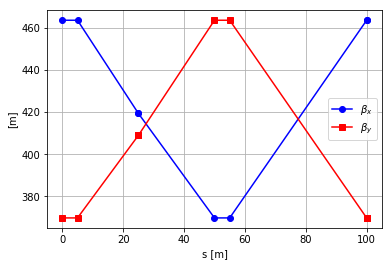

In [31]:
plt.plot(myDFTable['S'],myDFTable['BETX'],'o-b',label='$\\beta_x$')
plt.plot(myDFTable['S'],myDFTable['BETY'],'s-r',label='$\\beta_y$')
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.legend(loc='best')
plt.grid()

# Tune from the plot

For the phase advance one can consider the definition

\begin{equation}
\mu=\int\frac{1}{\beta(s)}ds.
\end{equation}

Remember that the unit of phase in MAD-X is [2$\pi$].

In [32]:
# a very basic approximation
1/400.*100/2/np.pi

0.039788735772973836

In [33]:
# computing the integral
np.trapz(1/myDFTable['BETX'],myDFTable['S'])/2/np.pi

0.038627864620407765

In [34]:
# correct values
myDFTable.iloc[-1]['MUX']

0.03853349451

In [35]:
# or
myDF['Q1']


./secondpart/secondTwiss.txt    0.038533
Name: Q1, dtype: float64

### Varying the energy

In [36]:
# with this simple wrapper in case of error the code enter in an infinite loop you have to stop manually.
myString='''
beam, particle=proton, energy=0.7;
title, 'My third twiss';
twiss, file=./secondpart/thirdTwiss.txt;
'''
myMad.input(myString);

ERROR WITH THE EXECUTION, PLEASE CHECK IT.


There is an error due to the fact that the total energy.

In [38]:
myMad.p.stderr.readlines()
# since the code crashed, you need to re-initialize it before continuing using it.

[]

### With f=20 m

In [39]:
madExecutable = '/usr/local/bin/madx'
myMad = madx.MadX(madExecutable)

  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.02.13  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2016.12.20               +
  + Execution date: 2019.01.21 21:21:09      +
  ++++++++++++++++++++++++++++++++++++++++++++




In [40]:
myString='''
! *********************************************************************
! Tutorial 1, second part
! *********************************************************************

! *********************************************************************
! Definition of parameters
! *********************************************************************

l_cell=100;
quadrupoleLenght=5;
f=20;
myK:=1/f/quadrupoleLenght;// m^-2

! *********************************************************************
! Definition of magnet
! ********************************************************************* 
QF: quadrupole, L=quadrupoleLenght, K1:=myK;
QD: quadrupole, L=quadrupoleLenght, K1:=-myK;


! *********************************************************************
! Definition of sequence
! *********************************************************************
myCell:sequence, refer=entry, L=L_CELL;
quadrupole1: QF, at=0;
marker1: marker, at=25;
quadrupole2: QD, at=50;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy=2;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************
select, flag=twiss, clear;
select, flag=twiss, column=name, keyword, s, betx, alfx, mux, bety, alfy, muy, x, px, y, py, dx, dy, dx, dpx, dy, dpy;

title, 'My fourth twiss';
twiss, file=./secondpart/fourthTwiss.txt;
'''
myMad.input(myString);

! *********************************************************************
! Tutorial 1, second part
! *********************************************************************
! *********************************************************************
! Definition of parameters
! *********************************************************************
l_cell=100;
quadrupoleLenght=5;
f=20;
myK:=1/f/quadrupoleLenght;// m^-2
! *********************************************************************
! Definition of magnet
! ********************************************************************* 
QF: quadrupole, L=quadrupoleLenght, K1:=myK;
QD: quadrupole, L=quadrupoleLenght, K1:=-myK;
! *********************************************************************
! Definition of sequence
! *********************************************************************
myCell:sequence, refer=entry, L=L_CELL;
quadrupole1: QF, at=0;
marker1: marker, at=25;
quadrupole2: QD, at=50;
endsequence;
! *********************************

**INTERPRETATION**: The cell is unstable due to the fact that the focal length is too short. Please note the value of the **cosmux** and **cosmuy**. 

### Adding markers 

This is an example to add markers in the sequence using a macros.

In [41]:
myString='''
! *********************************************************************
! Tutorial 1, second part
! *********************************************************************

! *********************************************************************
! Definition of parameters
! *********************************************************************

option, echo=false, info=false, warn=false;
l_cell=100;
quadrupoleLenght=5;
f=200;
myK:=1/f/quadrupoleLenght;// m^-2

! *********************************************************************
! Definition of magnet
! ********************************************************************* 
QF: quadrupole, L=quadrupoleLenght, K1:=myK;
QD: quadrupole, L=quadrupoleLenght, K1:=-myK;


installMarkers(nn): macro ={
markernn: marker, at=nn;
!value,f;
};
N=6;


! *********************************************************************
! Definition of sequence
! *********************************************************************
myCell:sequence, REFER=centre, L=L_CELL;
quadrupole1: QF, at=2.5;
while (N<50) {
exec, installMarkers($N);
N=N+1;
}
quadrupole2: QD, at=52.5;
N=56;
while (N<100) {
exec, installMarkers($N);
N=N+1;
}
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy=2;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************
select, flag=twiss, clear;
select, flag=twiss, column=name, keyword, L, s, betx, alfx, mux, bety, alfy, muy, x, px, y, py, dx, dy, dx, dpx, dy, dpy;

title, 'My fourth twiss';
twiss, file=./secondpart/fifthTwiss.txt;
'''
myMad.input(myString);

! *********************************************************************
! Tutorial 1, second part
! *********************************************************************
! *********************************************************************
! Definition of parameters
! *********************************************************************
option, echo=false, info=false, warn=false;



enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
++++++ table: summ
            length             orbit5               alfa            gammatr 
               100                 -0   -2.775557562e-16       -60023992.72 
                q1                dq1            betxmax              dxmax 
     0.03853349451      -0.0438471879        463.6232883                  0 
             dxrms             xcomax             xcorms                 q2 
                 0                

In [42]:
myDF=madx.tfs2pd('./secondpart/fifthTwiss.txt')
myDF
myDFTable=myDF.iloc[0].TABLE
myDFTable.head()

,NAME,KEYWORD,L,S,BETX,ALFX,MUX,BETY,ALFY,MUY,X,PX,Y,PY,DX,DY,DPX,DPY
0,MYCELL$START,MARKER,0.0,0.0,463.623288,-1.156109,0.000000,369.779162,0.929316,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,QUADRUPOLE1,QUADRUPOLE,5.0,5.0,463.623288,1.156109,0.001709,369.779162,-0.929316,0.002161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DRIFT_3,DRIFT,1.0,6.0,461.316110,1.151069,0.002053,371.642834,-0.934356,0.002590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MARKER6,MARKER,0.0,6.0,461.316110,1.151069,0.002053,371.642834,-0.934356,0.002590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DRIFT_3,DRIFT,1.0,7.0,459.019012,1.146029,0.002399,373.516585,-0.939396,0.003018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


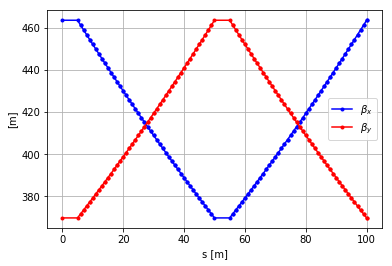

In [43]:
plt.plot(myDFTable['S'],myDFTable['BETX'],'.-b',label='$\\beta_x$')
plt.plot(myDFTable['S'],myDFTable['BETY'],'.-r',label='$\\beta_y$')
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.legend(loc='best')
plt.grid()

In [44]:
# computing the integral
np.trapz(1/myDFTable['BETX'],myDFTable['S'])/2/np.pi

0.03853163530314145

In [45]:
myString='''
select, flag=makethin, class=quadrupole, slice=5; 
makethin,sequence=myCell;
use,sequence=myCell;      
twiss,sequence=myCell,file=./secondpart/sixthTwiss.txt;
'''
myMad.input(myString);

makethin: slicing sequence : mycell
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
++++++ table: summ
            length             orbit5               alfa            gammatr 
               100                 -0   -2.775557562e-16       -60023992.72 
                q1                dq1            betxmax              dxmax 
     0.03853347061     -0.04384710631        466.5193743                  0 
             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0      0.03853347061 
               dq2            betymax              dymax              dyrms 
    -0.04384710631
       466.5193743                  0                  0 
            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0
                 0 
 

In [46]:
myDF=madx.tfs2pd('./secondpart/sixthtwiss.txt')
myDF
myDFTable=myDF.iloc[0].TABLE

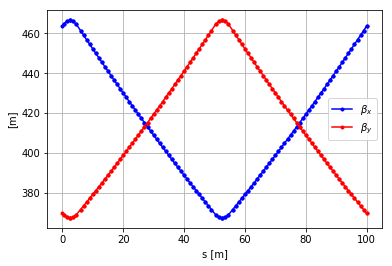

In [47]:
plt.plot(myDFTable['S'],myDFTable['BETX'],'.-b',label='$\\beta_x$')
plt.plot(myDFTable['S'],myDFTable['BETY'],'.-r',label='$\\beta_y$')
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.legend(loc='best')
plt.grid()

In [48]:
np.trapz(1/myDFTable['BETX'],myDFTable['S'])/2/np.pi

0.038533549045589637